## Online Retail Customer Segmentation
- Name : Krishanu Dutta
- Start Date : 06/03/2023

- Problem Description
 - In this project, your task is to identify major customer segments on a transnational data set which contains all the       transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The    company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
- Data Description
 - Attribute Information:
  1. InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
  2. StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
  3. Description: Product (item) name. Nominal.
  4. Quantity: The quantities of each product (item) per transaction. Numeric.
  5. InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
  5. UnitPrice: Unit price. Numeric, Product price per unit in sterling.
  6. CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
  7. Country: Country name. Nominal, the name of the country where each customer resides

#### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline

#### Data Loading 

In [2]:
df = pd.read_csv('OnlineRetail.csv', encoding= 'cp1252')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### we are seeing that customer id has 132606 null values and description has 1454 null values

#### we'll remove rows with null values as there is no use of those rows

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Now our data is clean from Null Values

#### we are introducing a new column name Total which will represent the total sell 

In [7]:
df['Total'] = df['UnitPrice'] * df['Quantity']

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


#### we are removing rows with Unit product price is 0

In [9]:
df.drop(df[(df.UnitPrice==0)].index,inplace=True)

#### as stated invoice no start with "C" is cancellation, so we have to remove these

In [10]:
df.drop(df[(df.InvoiceNo).str.contains('C')].index,inplace=True)

In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M' )

df['Year'] = df["InvoiceDate"].apply(lambda x: x.year)
df['Month-N'] = df["InvoiceDate"].apply(lambda x: x.month)
df['Day-N'] = df["InvoiceDate"].apply(lambda x: x.day)
df['HH'] = df["InvoiceDate"].apply(lambda x: x.hour)
df['Day']=df['InvoiceDate'].dt.day_name()
df['Month']=df['InvoiceDate'].dt.month_name()

In [130]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Year,Month-N,Day-N,HH,Day,Month,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,Wednesday,December,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,Wednesday,December,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,Wednesday,December,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,Wednesday,December,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,Wednesday,December,373 days 04:24:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,9,12,Friday,December,0 days 00:00:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,9,12,Friday,December,0 days 00:00:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12,Friday,December,0 days 00:00:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12,Friday,December,0 days 00:00:00


### To start Bifurcating the customers we,ll RFM technique
#### What is RFM?
- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

In [12]:
#Monetary 
df['CustomerID'] = df['CustomerID'].astype(str)
m= df.groupby('CustomerID')['Total'].sum()
m=m.reset_index()
m.columns = ['CustomerID', 'Total_Purchase']


#Frequency
f = df.groupby('CustomerID')['InvoiceNo'].count()
f=f.reset_index()
f.columns = ['CustomerID','Frequency']

#Recency
#max_date = '2011-12-09 12:50:00' |
#df['invoicedate'] will retrieve the perticular invoice date and the difference will show the difference in days

df['Diff'] = max(df['InvoiceDate']) - df['InvoiceDate']   
r = df.groupby('CustomerID')['Diff'].min()
r =r.reset_index()
r.columns = ['CustomerID','Diff']
r['Diff'] = r['Diff'].dt.days

In [13]:
seg= pd.merge(m,f,on='CustomerID',how='inner')
seg = pd.merge(seg,r,on='CustomerID',how='inner')
seg.columns = ['CustomerID', 'Total_purchase', 'Frequency', 'Recency']
print(seg.head())

  CustomerID  Total_purchase  Frequency  Recency
0    12346.0        77183.60          1      325
1    12347.0         4310.00        182        1
2    12348.0         1797.24         31       74
3    12349.0         1757.55         73       18
4    12350.0          334.40         17      309


#### Columns Details
- Total Purchase Done by Customers -- Total Purchase
- Total Transactions done by customers in {2010-12-01 and 2011-12-09} -- Frequency
- How recently did the customer visit our website or how recently did a customer purchase -- Recency

Text(0.5, 1.0, 'Frequency')

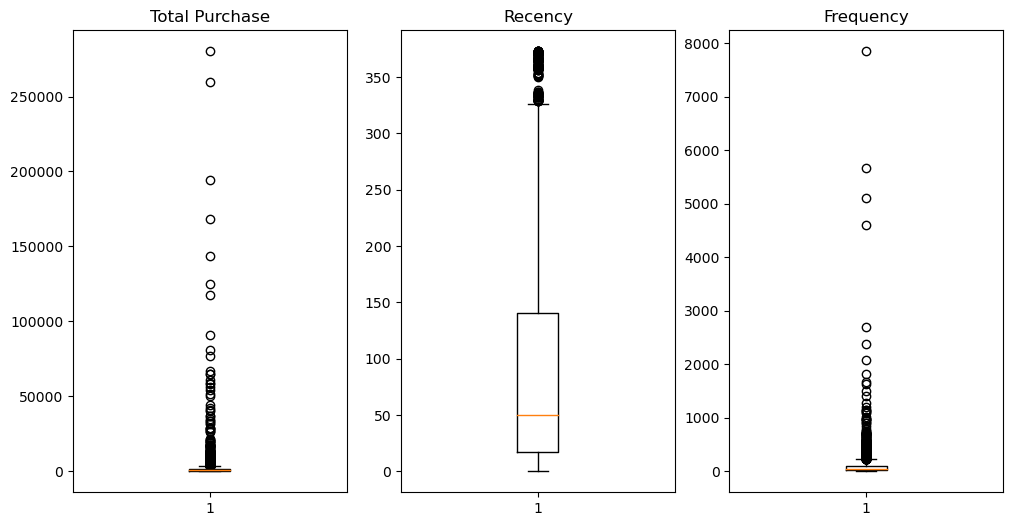

In [14]:
cols = ['Total_purchase',  'Frequency',  'Recency']
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,6))
ax1.boxplot(seg['Total_purchase'])
ax2.boxplot(seg['Recency'])
ax3.boxplot(seg['Frequency'])

ax1.set_title('Total Purchase')
ax2.set_title('Recency')
ax3.set_title('Frequency')

In [15]:
#R
Q1,Q3 = np.percentile(seg['Recency'] , [25,75])
IQR1 = Q3- Q1
lower_range1= Q1 - (1.5 * IQR1)
upper_range1 = Q3 + (1.5 * IQR1)

#F
Q11,Q31 = np.percentile(seg['Frequency'] , [25,75])
IQR2 = Q31- Q11
lower_range2= Q11 - (1.5 * IQR2)
upper_range2 = Q31 + (1.5 * IQR2)

#M
Q111,Q311 = np.percentile(seg['Total_purchase'] , [25,75])
IQR3 = Q311- Q111
lower_range3= Q111 - (1.5 * IQR3)
upper_range3 = Q311 + (1.5 * IQR3)

## Model Building

#### Total Purchase and Frequency 

In [17]:
seg_final= seg[(seg.Total_purchase<upper_range3)&(seg.Frequency<upper_range2)]

Text(0.5, 1.0, 'Frequency')

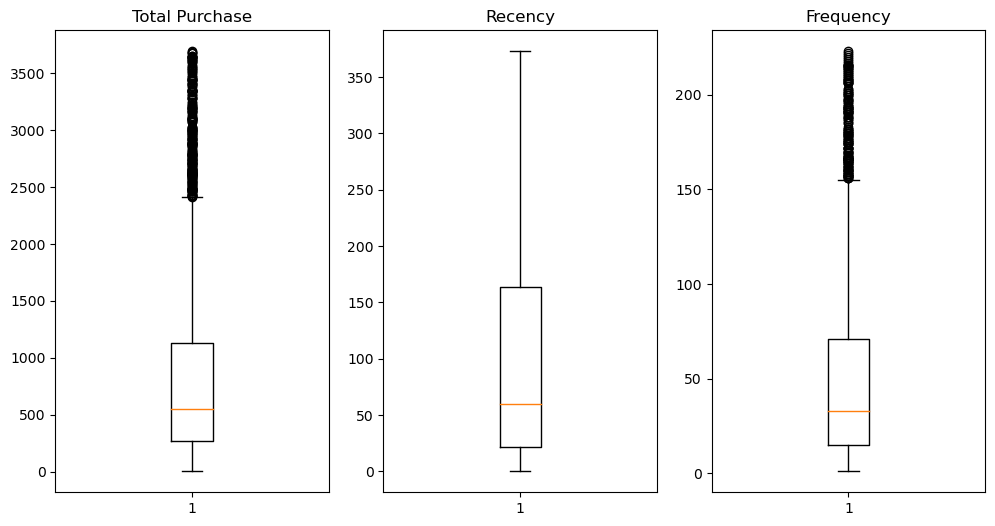

In [18]:

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,6))
ax1.boxplot(seg_final['Total_purchase'])
ax2.boxplot(seg_final['Recency'])
ax3.boxplot(seg_final['Frequency'])

ax1.set_title('Total Purchase')
ax2.set_title('Recency')
ax3.set_title('Frequency')

In [19]:
seg_final.describe()

,Total_purchase,Frequency,Recency
count,3760.000000,3760.000000,3760.000000
mean,831.608496,50.129521,101.824734
std,781.869799,47.185539,102.290391
min,3.750000,1.000000,0.000000
25%,271.162500,15.000000,22.000000
50%,551.520000,33.000000,60.000000
75%,1128.067500,71.000000,164.000000
max,3692.280000,223.000000,373.000000


In [65]:
#scaling
X = seg_final[['Total_purchase', 'Frequency']].values
scaler = MinMaxScaler()
seg_scaled= scaler.fit_transform(X)

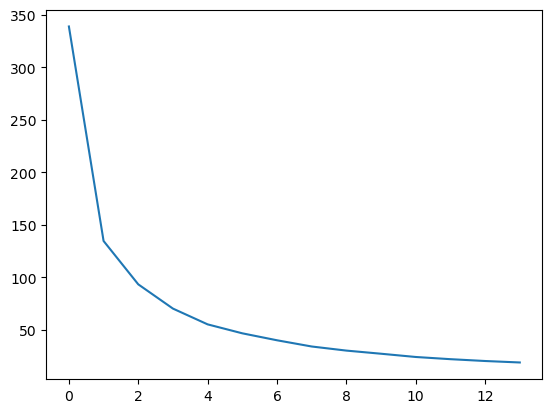

In [66]:

#wss
wss = []
for num_clusters in range(1,15):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(seg_scaled)
    wss.append(kmeans.inertia_)
    
plt.plot(wss)

In [67]:
#silhouette score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(seg_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(seg_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6098021884507259
For n_clusters=3, the silhouette score is 0.505728873308795
For n_clusters=4, the silhouette score is 0.4997565220079343
For n_clusters=5, the silhouette score is 0.464314026831088
For n_clusters=6, the silhouette score is 0.4845174026451484
For n_clusters=7, the silhouette score is 0.4170369064667608
For n_clusters=8, the silhouette score is 0.4222791974264153


In [68]:
#model creation
kmeans = KMeans(n_clusters=2, max_iter=100)
kmeans.fit(seg_scaled)
lbs = kmeans.labels_
y_kmeans= kmeans.predict(seg_scaled)
print(kmeans.labels_)

[1 0 1 ... 1 1 0]


In [69]:
#Find the clusters for the observation given in the dataset
seg_final['Cluster_based_rec_mon'] = lbs
seg_final.head(10)

C:\Users\kishor\AppData\Local\Temp\ipykernel_11704\1961853077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg_final['Cluster_based_rec_mon'] = lbs


,CustomerID,Total_purchase,Frequency,Recency,Cluster_based_rec_mon
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1
5,12352.0,2506.04,85,35,0
6,12353.0,89.00,4,203,1
7,12354.0,1079.40,58,231,1
8,12355.0,459.40,13,213,1
9,12356.0,2811.43,59,22,0
11,12358.0,1168.06,19,1,1
13,12360.0,2662.06,129,51,0


In [70]:
centre = kmeans.cluster_centers_
centre

array([[0.51639544, 0.52230923],
       [0.13430441, 0.12837289]])

ValueError: 'c' argument has 3804 elements, which is inconsistent with 'x' and 'y' with size 3760.

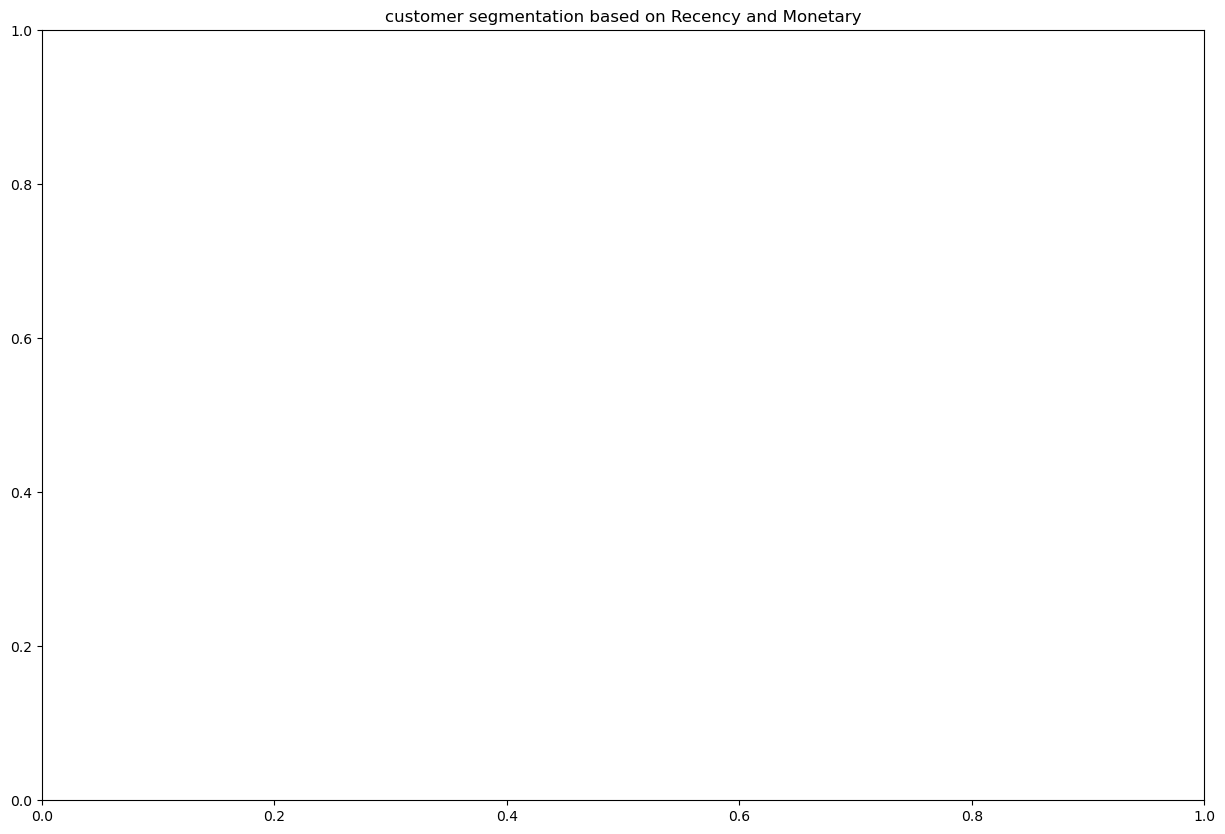

In [132]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(seg_scaled[:, 0], seg_scaled[:, 1],c=y_kmeans, s=50, cmap='winter')

plt.scatter(centre[:, 0], centre[:, 1], c='y', s=300, alpha=0.8)

In [72]:
silhouette_score_average = silhouette_score(seg_scaled, kmeans.predict(seg_scaled))
print(f'Accuracy: {silhouette_score_average*100} %')
# lets see what that score it

Accuracy: 60.913769986583574 %


#### Frequency And Recency

In [123]:
seg_final2= seg[(seg.Recency<upper_range1)&(seg.Frequency<upper_range2)]

In [124]:
#scaling
X = seg_final2[['Frequency','Recency']].values
scaler = MinMaxScaler()
seg_scaled2= scaler.fit_transform(X)

In [125]:
seg_scaled2

array([[0.        , 0.99693252],
       [0.81165919, 0.00306748],
       [0.13452915, 0.22699387],
       ...,
       [0.02690583, 0.55214724],
       [0.04932735, 0.02147239],
       [0.30941704, 0.12883436]])

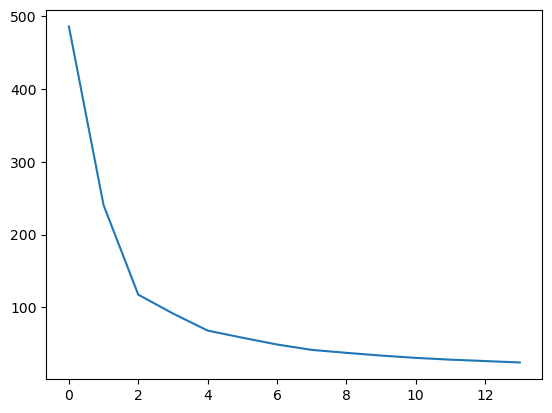

In [126]:

#wss
wss = []
for num_clusters in range(1,15):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(seg_scaled2)
    wss.append(kmeans.inertia_)
    
plt.plot(wss)

In [127]:
#silhouette score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(seg_scaled2)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(seg_scaled2, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.507397398252449
For n_clusters=3, the silhouette score is 0.5256287393055886
For n_clusters=4, the silhouette score is 0.463097157965435
For n_clusters=5, the silhouette score is 0.44521941415113236
For n_clusters=6, the silhouette score is 0.45173969039211076
For n_clusters=7, the silhouette score is 0.41301296636861917
For n_clusters=8, the silhouette score is 0.4013696169026864


In [128]:
#model creation
kmeans = KMeans(n_clusters=3, max_iter=100)
kmeans.fit(seg_scaled2)
lbs = kmeans.labels_
y_kmeans= kmeans.predict(seg_scaled2)
centre = kmeans.cluster_centers_
print(kmeans.labels_)

[1 2 0 ... 1 0 0]


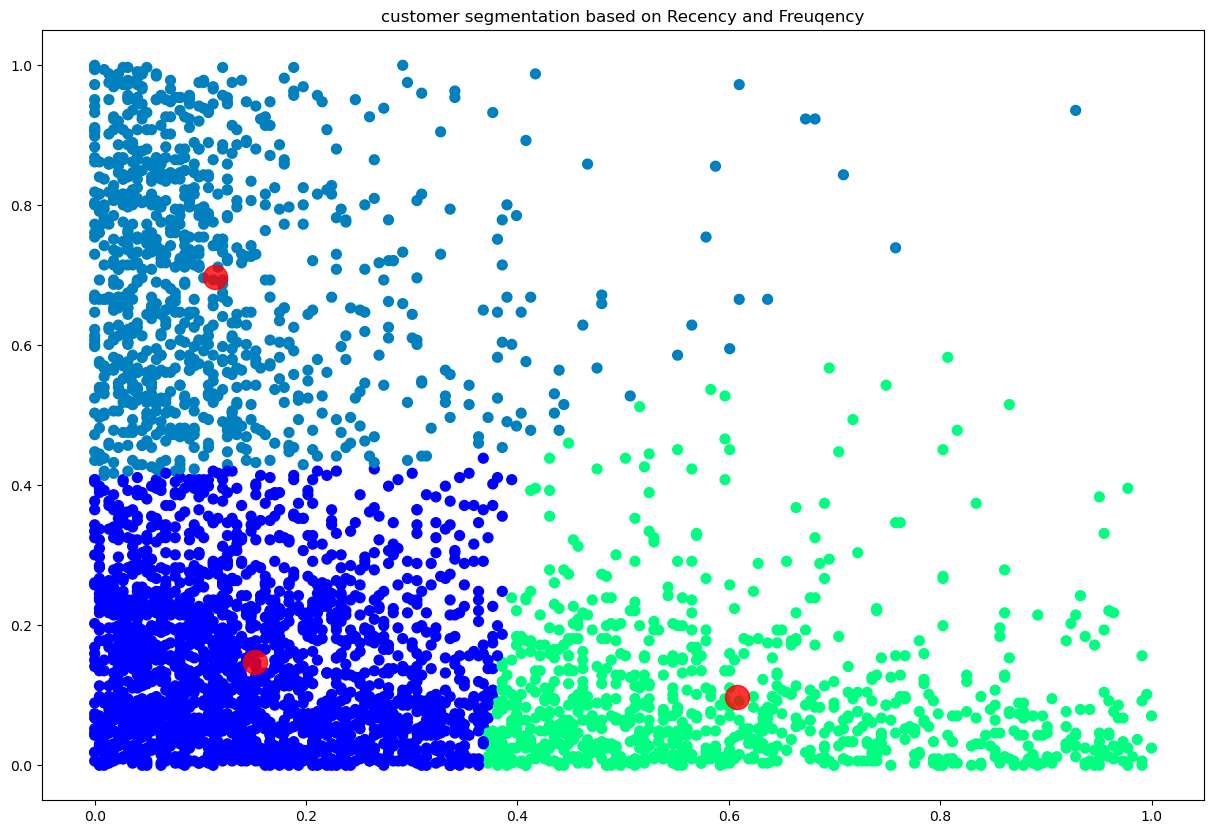

In [129]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Freuqency')
plt.scatter(seg_scaled2[:, 0], seg_scaled2[:, 1],c=y_kmeans, s=50, cmap='winter')

plt.scatter(centre[:, 0], centre[:, 1], c='red', s=300, alpha=0.8)

In [115]:
silhouette_score_average = silhouette_score(seg_scaled2, kmeans.predict(seg_scaled2))
print(f'Accuracy: {silhouette_score_average*100} %')
# lets see what that score it

Accuracy: 52.562873930558865 %


#### Total Purchase and Recency

In [116]:
seg_final3= seg[(seg.Total_purchase<upper_range3)&(seg.Recency<upper_range1)]

In [117]:


#scaling
X = seg_final3[['Total_purchase','Recency']].values
scaler = MinMaxScaler()
seg_scaled3= scaler.fit_transform(X)

In [118]:
#silhouette score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(seg_scaled3)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(seg_scaled3, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5182955106489084
For n_clusters=3, the silhouette score is 0.5382827772821662
For n_clusters=4, the silhouette score is 0.4738289414337416
For n_clusters=5, the silhouette score is 0.4503715553750641
For n_clusters=6, the silhouette score is 0.4017659885402392
For n_clusters=7, the silhouette score is 0.4164642250157578
For n_clusters=8, the silhouette score is 0.405195893917317


In [119]:
#model creation
kmeans = KMeans(n_clusters=3, max_iter=100)
kmeans.fit(seg_scaled3)
lbs = kmeans.labels_
y_kmeans= kmeans.predict(seg_scaled3)
centre = kmeans.cluster_centers_
print(kmeans.labels_)

[2 2 1 ... 0 2 2]


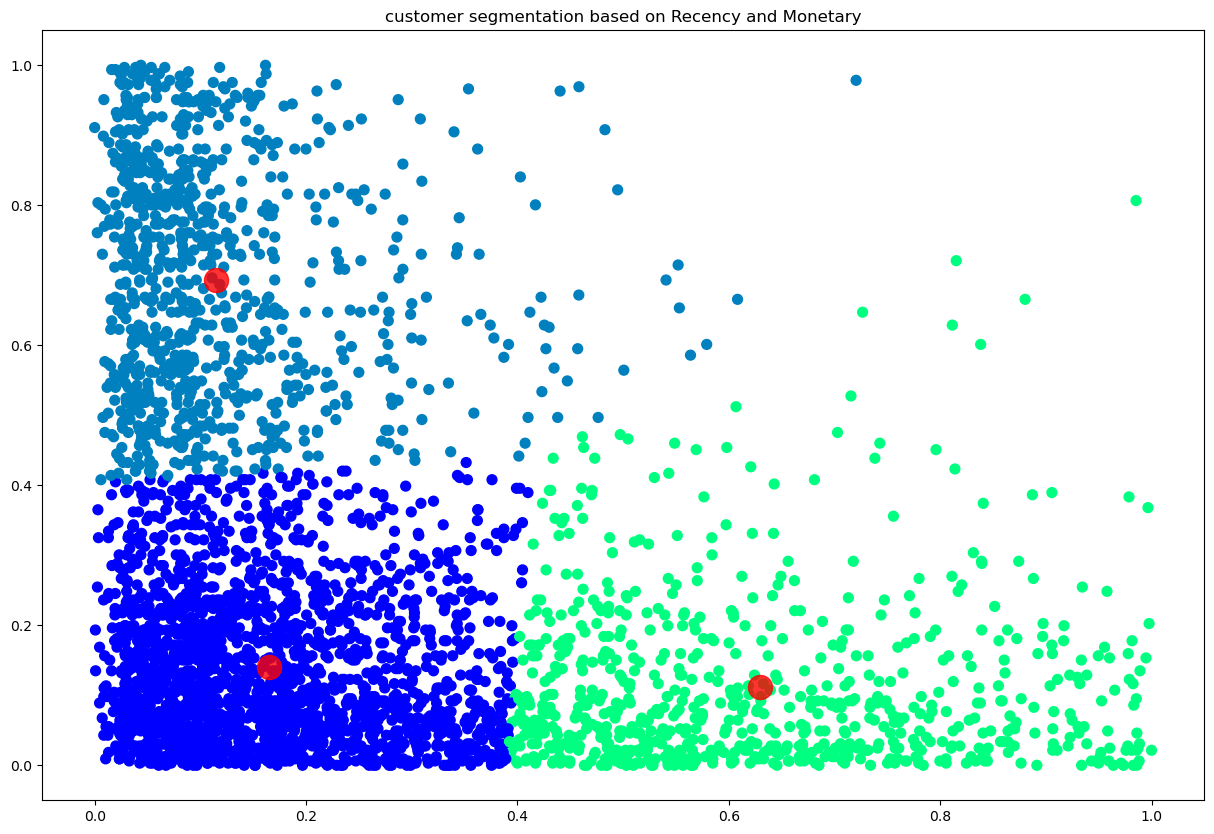

In [120]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(seg_scaled3[:, 0], seg_scaled3[:, 1],c=y_kmeans, s=50, cmap='winter')

plt.scatter(centre[:, 0], centre[:, 1], c='red', s=300, alpha=0.8)

In [121]:
silhouette_score_average = silhouette_score(seg_scaled3, kmeans.predict(seg_scaled3))
print(f'Accuracy: {silhouette_score_average*100} %')
# lets see what that score it

Accuracy: 53.82827772821662 %


#### All the columns without outlier removal

In [97]:


#scaling
X = seg[['Total_purchase','Recency','Frequency']].values
scaler = MinMaxScaler()
seg_scaled4= scaler.fit_transform(X)

In [98]:
#silhouette score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(seg_scaled4)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(seg_scaled4, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7269178311461908
For n_clusters=3, the silhouette score is 0.6526537742273115
For n_clusters=4, the silhouette score is 0.5773844005819992
For n_clusters=5, the silhouette score is 0.5703214535750589
For n_clusters=6, the silhouette score is 0.5802879419719246
For n_clusters=7, the silhouette score is 0.5588369262031949
For n_clusters=8, the silhouette score is 0.49123967666280044


In [104]:
#model creation
kmeans = KMeans(n_clusters=2, max_iter=100)
kmeans.fit(seg_scaled4)
lbs = kmeans.labels_
y_kmeans= kmeans.predict(seg_scaled4)
centre = kmeans.cluster_centers_
print(kmeans.labels_)

[1 0 0 ... 0 0 0]


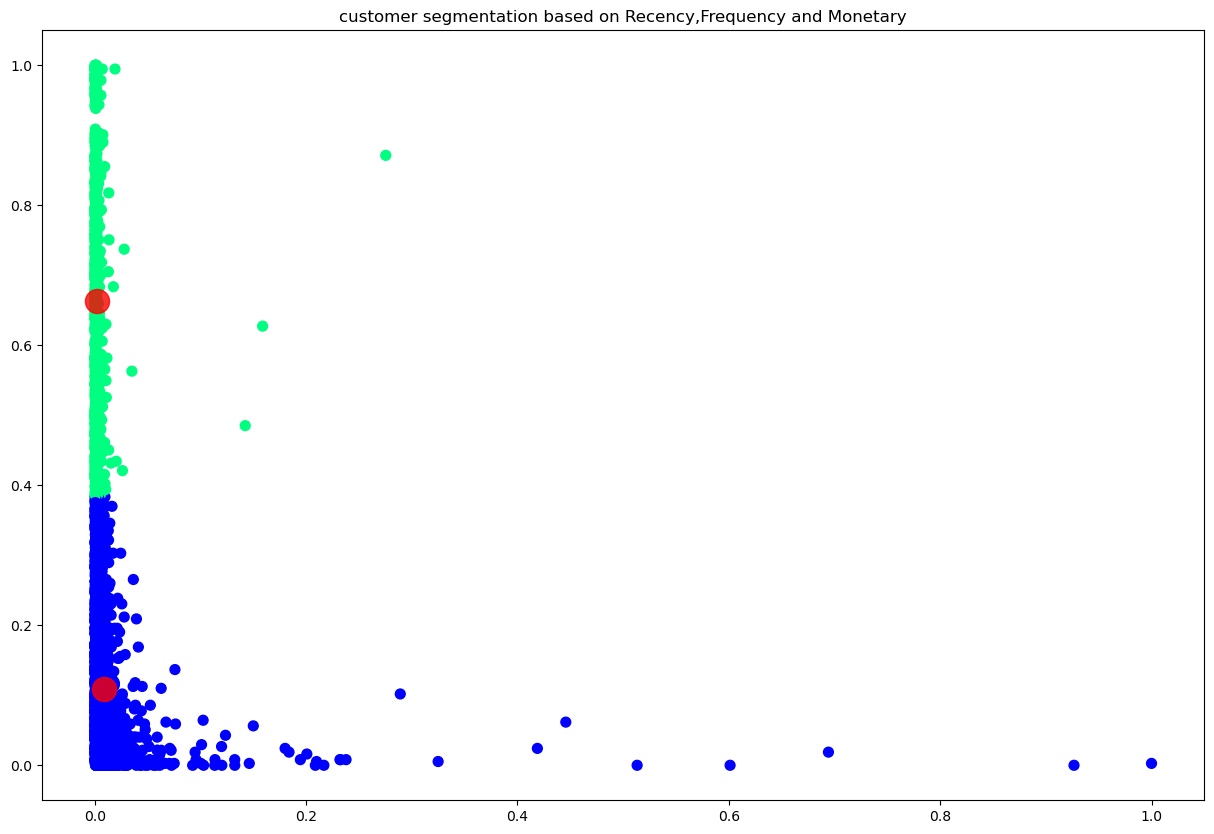

In [105]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency,Frequency and Monetary')
plt.scatter(seg_scaled4[:, 0], seg_scaled4[:, 1],c=y_kmeans, s=50, cmap='winter')

plt.scatter(centre[:, 0], centre[:, 1], c='red', s=300, alpha=0.8)